# Faulty Solar Panels Detection using Deep Learning

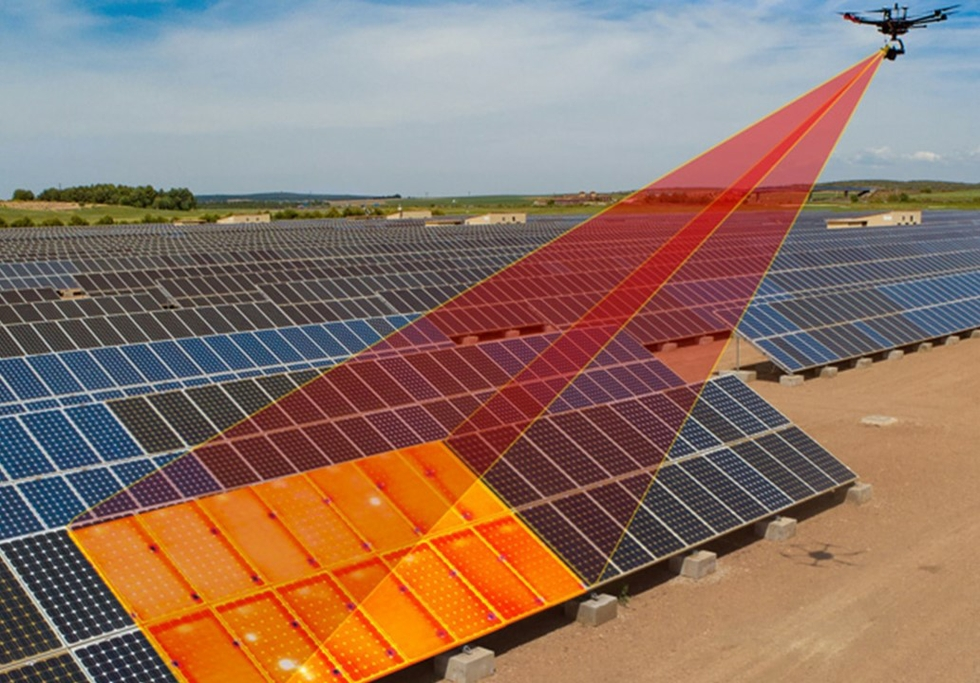

### Faulty Solar Panel classification using Deep Learning-
In this project, we investigate & classify faulty solar panels using deep learning algorithm & deep learning models can learn to distinguish between different types of patterns. Deep learning model could be trained to distinguish between the patterns of cracked panel, dirty panel, burned-out panel, bird dropping on solar panel and snow cover on solar panel, electrical damage on solar panel surfaces also identify the location of a cracked panel within a solar plant.

Deep learning is a powerful tool that can be used to improve the efficiency and reliability of solar panel systems. By identifying and localizing faults early on, deep learning can help to prevent costly repairs and downtimes. This can be potential to revolutionize solar panel fault detection. By automating the process and improving accuracy, deep learning can help to improve the efficiency and reliability of solar panel systems.
##### Benefits of using Deep Learning for Solar Panel Fault Detection- 

Achieve high accuracy in detecting faults, even in cases where human inspectors may miss them. 

Quickly scan large amounts of data to identify potential faults. 

Easily scaled to handle larger and more complex datasets. 

Automate the fault detection process, which can save money on labor costs. 

##### Objective-
Advanced analytics, monitoring and cleaning solar panels is a crucial task, hence developing an optimal procedure to monitor and clean these panels is very important in order to increase modules efficiency, reduce maintenance cost and reducing the use of resources. The accumulation of dust, snow, bird drops, shadow etc. on the surface of solar panels reduces the efficiency of the solar modules and hence the amount of produced energy.

##### Dataset contains 6 different class folders of images contains-

1. Bird-drop: This directory has images of bird-drop on solar panels
2. Clean: This directory has images of clean solar panels
3. Dusty: This directory has images of dusty solar panels
4. Electrical-damage: This directory has images of electrical-damage solar panels
5. Physical-Damage: This directory has images of physical-damage solar panels
6. Snow-Covered: This directory has images of snow-covered on solar panels

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 
import tensorflow as tf
import random
from cv2 import resize
from glob import glob
import warnings
warnings.filterwarnings("ignore")

In [2]:
img_height = 244
img_width = 244
train_ds = tf.keras.utils.image_dataset_from_directory('Faulty_solar_panel',validation_split=0.2,
  subset='training', image_size=(img_height, img_width), batch_size=32, seed=42, shuffle=True)

val_ds = tf.keras.utils.image_dataset_from_directory('Faulty_solar_panel', validation_split=0.2,
  subset='validation', image_size=(img_height, img_width), batch_size=32, seed=42, shuffle=True)

Found 885 files belonging to 6 classes.
Using 708 files for training.
Found 885 files belonging to 6 classes.
Using 177 files for validation.


In [3]:
class_names = train_ds.class_names
print(class_names)
train_ds

['Bird-drop', 'Clean', 'Dusty', 'Electrical-damage', 'Physical-Damage', 'Snow-Covered']


<BatchDataset element_spec=(TensorSpec(shape=(None, 244, 244, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

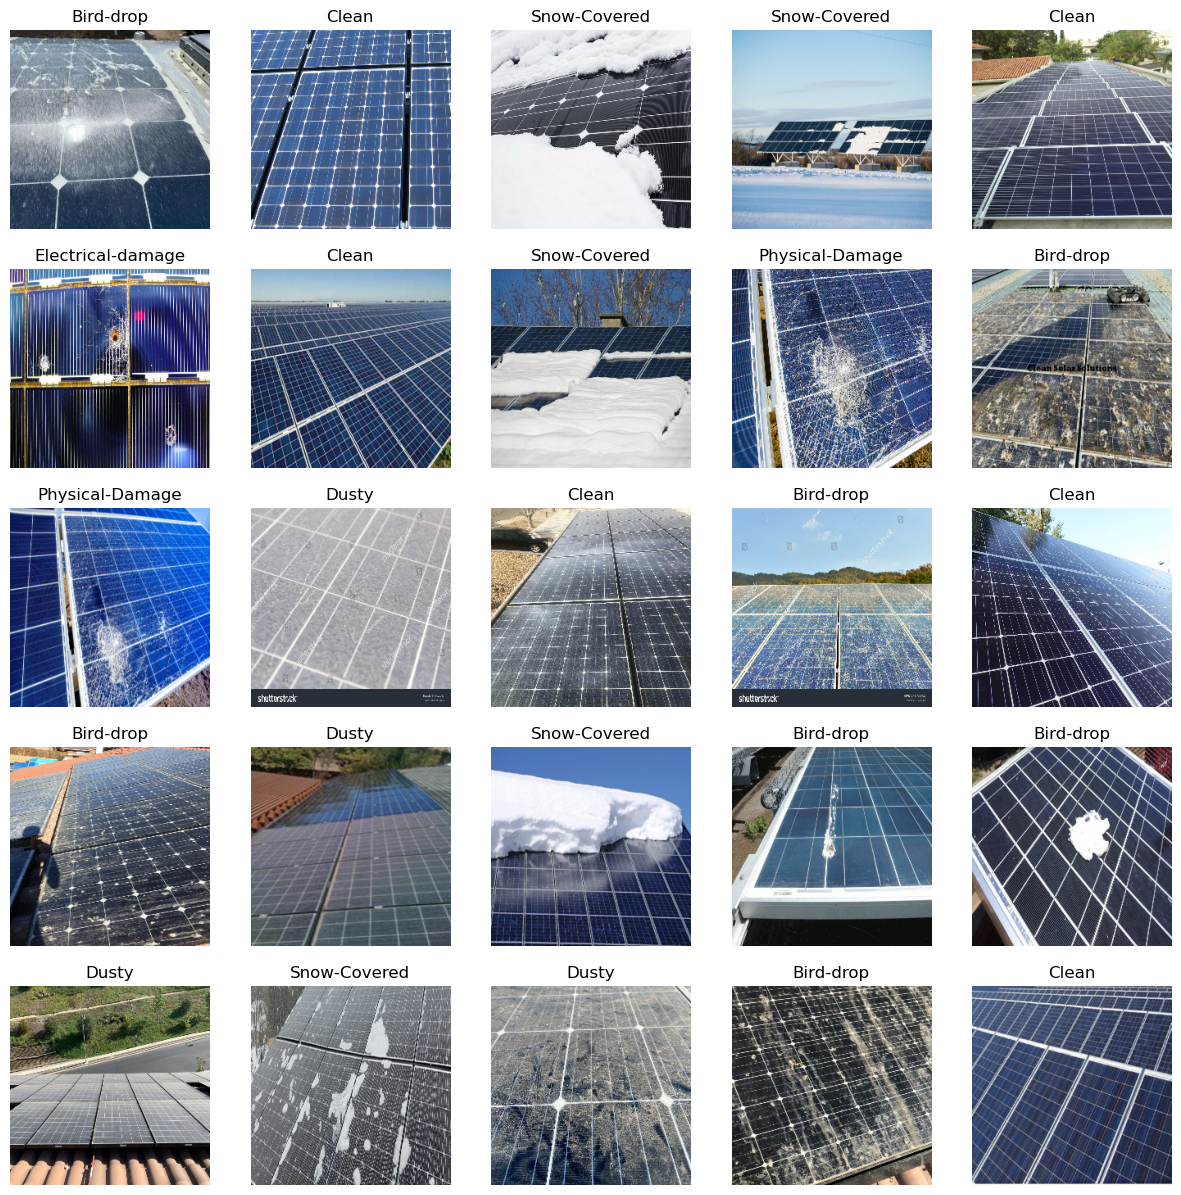

In [4]:
plt.figure(figsize=(15, 15))
for images, labels in train_ds.take(1):
    for i in range(25):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

## VGG16 - Visual Geometry Group 

Visual Geometry Group (VGG) is a convolutional neural network (CNN) that is widely used for image classification. VGG16 is a deep network, with 16 layers, and it has been shown to be very effective at image classification. It has achieved state-of-the-art results on a number of benchmark datasets, including ImageNet.

![](https://www.researchgate.net/profile/Amir-Mosavi-3/publication/334992074/figure/fig2/AS:788879695179776@1565094984739/VGG-16-model-Illustration-of-using-the-VGG-16-for-transfer-learning-The-convolution.png)

By using these techniques, it is possible to overcome the limitations of VGG16 and achieve good performance on image classification tasks.

In [5]:
base_model = tf.keras.applications.VGG16(include_top=False,weights='imagenet',input_shape=(img_height,img_width,3))
base_model.trainable = False

In [6]:
inputs = tf.keras.Input(shape=(img_height, img_width, 3))
x = tf.keras.applications.vgg16.preprocess_input(inputs)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.3)(x)
outputs = tf.keras.layers.Dense(90)(x)
model = tf.keras.Model(inputs, outputs)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 244, 244, 3)]     0         
                                                                 
 tf.__operators__.getitem (S  (None, 244, 244, 3)      0         
 licingOpLambda)                                                 
                                                                 
 tf.nn.bias_add (TFOpLambda)  (None, 244, 244, 3)      0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 512)               0     

In [7]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='cnn_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


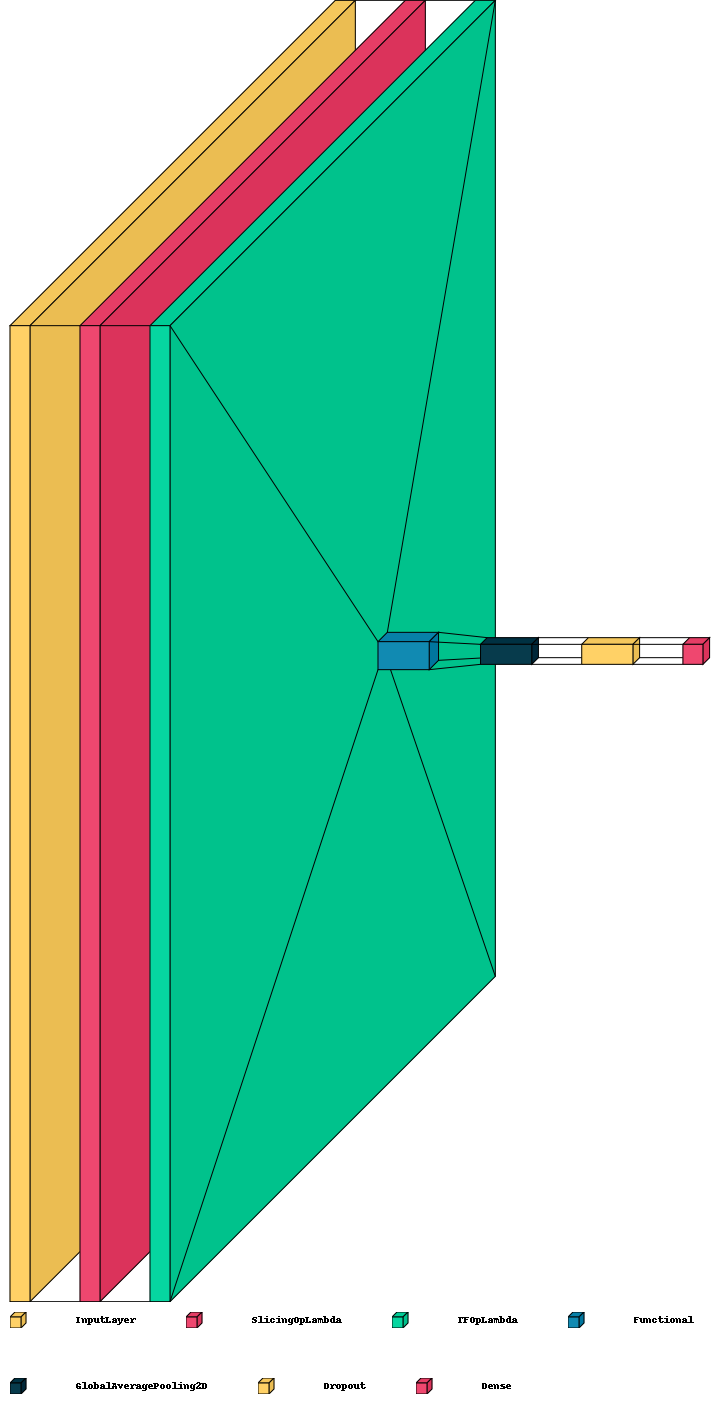

In [8]:
# !pip install visualkeras
import visualkeras
visualkeras.layered_view(model,legend=True,spacing=50,background_fill = 'white')

In [9]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [10]:
epoch = 15
model.fit(train_ds, validation_data=val_ds, epochs=epoch,
    callbacks = [
        tf.keras.callbacks.EarlyStopping(
            monitor="val_loss",
            min_delta=1e-2,
            patience=3,
            verbose=1,
            restore_best_weights=True)])

Epoch 1/15
23/23 [==============================] - 522s 22s/step - loss: 11.5265 - accuracy: 0.0847 - val_loss: 4.2869 - val_accuracy: 0.2938
Epoch 2/15
23/23 [==============================] - 516s 22s/step - loss: 5.9337 - accuracy: 0.2486 - val_loss: 2.5919 - val_accuracy: 0.4181
Epoch 3/15
23/23 [==============================] - 519s 22s/step - loss: 3.8764 - accuracy: 0.3404 - val_loss: 1.9340 - val_accuracy: 0.5367
Epoch 4/15
23/23 [==============================] - 544s 24s/step - loss: 2.8359 - accuracy: 0.4619 - val_loss: 1.7360 - val_accuracy: 0.5763
Epoch 5/15
23/23 [==============================] - 504s 22s/step - loss: 2.4074 - accuracy: 0.4972 - val_loss: 1.5107 - val_accuracy: 0.6215
Epoch 6/15
23/23 [==============================] - 500s 22s/step - loss: 1.8591 - accuracy: 0.5706 - val_loss: 1.3960 - val_accuracy: 0.6441
Epoch 7/15
23/23 [==============================] - 516s 22s/step - loss: 1.9447 - accuracy: 0.5763 - val_loss: 1.2624 - val_accuracy: 0.6780
Epoch

In [11]:
# fine tuning
base_model.trainable = True
for layer in base_model.layers[:14]:
    layer.trainable = False
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 244, 244, 3)]     0         
                                                                 
 tf.__operators__.getitem (S  (None, 244, 244, 3)      0         
 licingOpLambda)                                                 
                                                                 
 tf.nn.bias_add (TFOpLambda)  (None, 244, 244, 3)      0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 512)               0     

In [12]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
epoch = 15
history = model.fit(train_ds, validation_data=val_ds, epochs=epoch,
    callbacks = [
        tf.keras.callbacks.EarlyStopping(
            monitor="val_loss",
            min_delta=1e-2,
            patience=3,
            verbose=1)])

Epoch 1/15
23/23 [==============================] - 614s 25s/step - loss: 0.9757 - accuracy: 0.6921 - val_loss: 0.7685 - val_accuracy: 0.7288
Epoch 2/15
23/23 [==============================] - 594s 26s/step - loss: 0.3365 - accuracy: 0.8870 - val_loss: 0.6280 - val_accuracy: 0.8192
Epoch 3/15
23/23 [==============================] - 646s 28s/step - loss: 0.1709 - accuracy: 0.9421 - val_loss: 0.7645 - val_accuracy: 0.8079
Epoch 4/15
23/23 [==============================] - 669s 29s/step - loss: 0.1012 - accuracy: 0.9661 - val_loss: 1.0392 - val_accuracy: 0.8192
Epoch 5/15
23/23 [==============================] - 626s 27s/step - loss: 0.1575 - accuracy: 0.9463 - val_loss: 0.6422 - val_accuracy: 0.8418
Epoch 5: early stopping


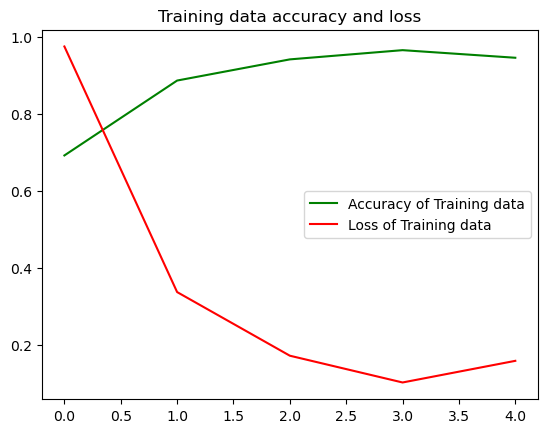

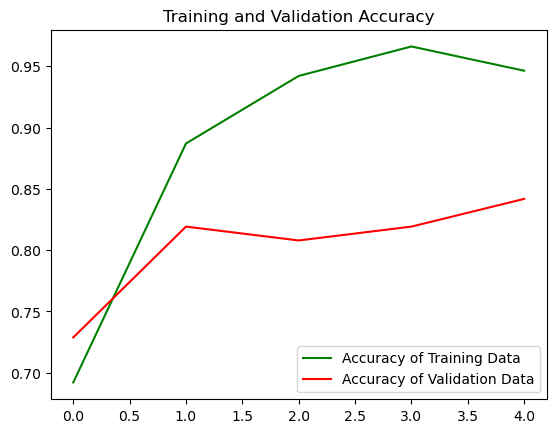

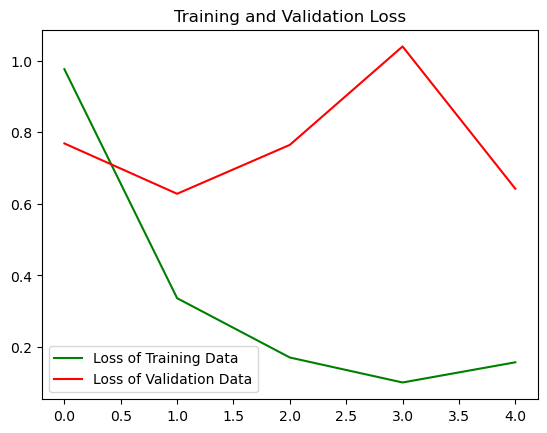

<Figure size 640x480 with 0 Axes>

In [14]:
get_ac = history.history['accuracy']
get_los = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(len(get_ac))
plt.plot(epochs, get_ac, 'g', label='Accuracy of Training data')
plt.plot(epochs, get_los, 'r', label='Loss of Training data')
plt.title('Training data accuracy and loss')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, get_ac, 'g', label='Accuracy of Training Data')
plt.plot(epochs, val_acc, 'r', label='Accuracy of Validation Data')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, get_los, 'g', label='Loss of Training Data')
plt.plot(epochs, val_loss, 'r', label='Loss of Validation Data')
plt.title('Training and Validation Loss')
plt.legend(loc=0)
plt.figure()
plt.show()

#### Result Classification

1/1 [==============================] - 1s 589ms/step


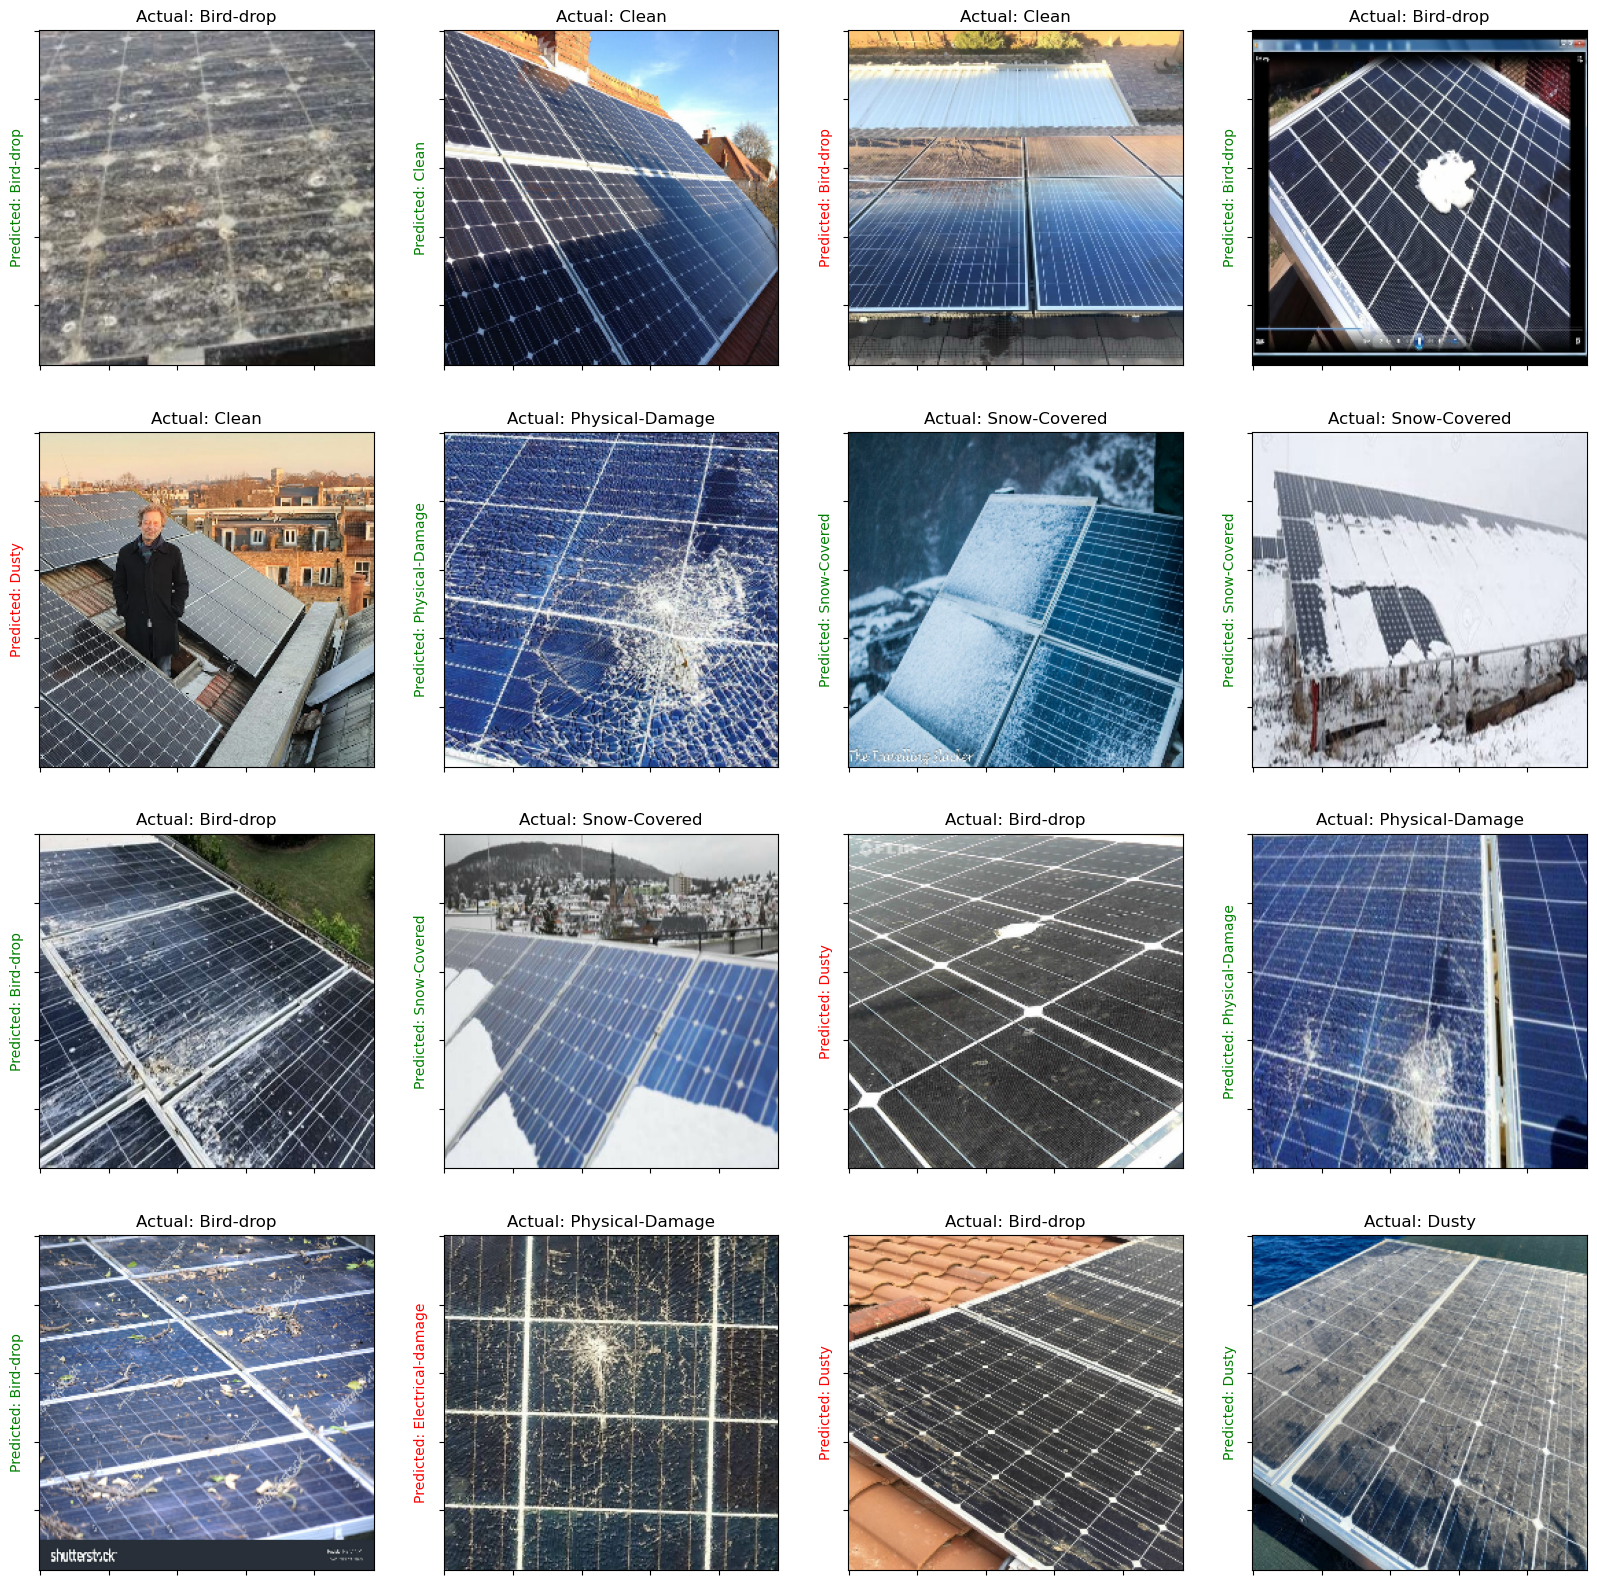

In [15]:
loss, accuracy = model.evaluate(val_ds)

plt.figure(figsize=(20, 20))
for images, labels in val_ds.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predictions = model.predict(tf.expand_dims(images[i], 0))
        score = tf.nn.softmax(predictions[0])
        if(class_names[labels[i]]==class_names[np.argmax(score)]):
            plt.title("Actual: "+class_names[labels[i]])
            plt.ylabel("Predicted: "+class_names[np.argmax(score)],fontdict={'color':'green'})
            
        else:
            plt.title("Actual: "+class_names[labels[i]])
            plt.ylabel("Predicted: "+class_names[np.argmax(score)],fontdict={'color':'red'})
        plt.gca().axes.yaxis.set_ticklabels([])        
        plt.gca().axes.xaxis.set_ticklabels([])